In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import umap.umap_ as um
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as sil

In [2]:
data = pd.read_csv("cirrhosis.csv")

In [15]:
#Lists out the header
print(data.columns, data.shape)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object') (418, 20)


In [16]:
#Mentions the type of data
data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [3]:
#Converts all categorical to numerical variable
object = []
object_labels = []
for i in range(len(data.columns)):
    if str(data[data.columns[i]].dtypes)=='object':
        object.append(i) #Appends all the column name which are objects.
        object_labels.append(data[data.columns[i]].unique())
        for j in range(data[data.columns[i]].value_counts().count()):
            data[data.columns[i]].replace(data[data.columns[i]].unique()[j], j, inplace=True)

In [49]:
#Reviewing the pure numeric data
print(data.head)
print(data.dtypes)

<bound method NDFrame.head of       ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0      1     400       0   0.0  21464    0      0.0           0.0      0.0   
1      2    4500       1   0.0  20617    0      1.0           0.0      0.0   
2      3    1012       0   0.0  25594    1      1.0           1.0      1.0   
3      4    1925       0   0.0  19994    0      1.0           0.0      0.0   
4      5    1504       2   1.0  13918    0      1.0           0.0      0.0   
..   ...     ...     ...   ...    ...  ...      ...           ...      ...   
413  414     681       0   NaN  24472    0      NaN           NaN      NaN   
414  415    1103       1   NaN  14245    0      NaN           NaN      NaN   
415  416    1055       1   NaN  20819    0      NaN           NaN      NaN   
416  417     691       1   NaN  21185    0      NaN           NaN      NaN   
417  418     976       1   NaN  19358    0      NaN           NaN      NaN   

     Edema  Bilirubin  Cholestero

In [50]:
#Reviewing the object-type variable list
print(object)
print(object_labels)

[2, 3, 5, 6, 7, 8, 9]
[array(['D', 'C', 'CL'], dtype=object), array(['D-penicillamine', 'Placebo', nan], dtype=object), array(['F', 'M'], dtype=object), array(['Y', 'N', nan], dtype=object), array(['Y', 'N', nan], dtype=object), array(['Y', 'N', nan], dtype=object), array(['Y', 'N', 'S'], dtype=object)]


In [51]:
#No. of non numericals 
data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [4]:
#For filling NA data type
for i in range(len(data.columns)):
    if data[data.columns[i]].isna().sum()>0:
        if i in object==True:
            m = sp.stats.mode(data[data.columns[i]])
            data[data.columns[i]].fillna(m, inplace=True)
        else:
            m = np.mean(data[data.columns[i]])
            data[data.columns[i]].fillna(m, inplace=True)

In [5]:
#Again reviewing the changes
print(data.head())
print(data.isna().sum())
print(data.shape)

   ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0   1     400       0   0.0  21464    0      0.0           0.0      0.0   
1   2    4500       1   0.0  20617    0      1.0           0.0      0.0   
2   3    1012       0   0.0  25594    1      1.0           1.0      1.0   
3   4    1925       0   0.0  19994    0      1.0           0.0      0.0   
4   5    1504       2   1.0  13918    0      1.0           0.0      0.0   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0      0       14.5        261.0     2.60   156.0    1718.0  137.95   
1      1        1.1        302.0     4.14    54.0    7394.8  113.52   
2      2        1.4        176.0     3.48   210.0     516.0   96.10   
3      2        1.8        244.0     2.54    64.0    6121.8   60.63   
4      1        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      

In [188]:
#Parameters for UMAP esp=0.98, 
N = np.linspace(3, 30, 10)
mins = np.linspace(0.1, 1, 10)
Rand = np.linspace(10, 1000, 5)

In [189]:
#Parameters for DBSCAN esp=
Esps = np.linspace(0.1, 1, 20)
mines = np.linspace(15, 30, 20)

In [190]:
score = 0
Np, minsp, Espsp, minesp, ran = 0, 0, 0, 0, 0
for k in range(len(Rand)):
    for i in range(len(mins)):
        LOW_Dim_dat = um.UMAP(n_neighbors=int(N[i]), min_dist=mins[i], n_components=2, random_state=int(Rand[k])).fit_transform((data-data.mean())/data.std())
        LOW_dat = pd.DataFrame(LOW_Dim_dat)
        for j in range(len(mines)):
            '''Here we're bound to get Value Error because silhouette score can't be computed on a data of single 
            cluster so here we use try & exception to ignore such error in loop'''
            try:
                dbs = DBSCAN(eps=Esps[j], min_samples=int(mines[j]))
                CL_dbs = dbs.fit_predict(LOW_dat)
                (Value, Count) = np.unique(CL_dbs, return_counts=True)
                x = len(Value) + 10*sil(data, CL_dbs)
                if x>score:
                    score = x
                    Np, minsp, Espsp, minesp, ran = int(N[i]), mins[i], Esps[j], int(mines[j]), int(Rand[k])
            except ValueError: pass
print(score, Np, minsp, Espsp, minesp, ran)

/home/alcor/.local/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(
/home/alcor/.local/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(
/home/alcor/.local/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(
/home/alcor/.local/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(
/home/alcor/.local/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  warn(


6.157469118097124 9 0.30000000000000004 0.9526315789473684 29 257


In [191]:
low_Dim_dat = um.UMAP(n_neighbors=Np, min_dist=minsp, n_components=2, random_state=ran).fit_transform((data-data.mean())/data.std())

In [192]:
low_dat = pd.DataFrame(low_Dim_dat, columns=['col1', 'col2'])

In [193]:
dbs = DBSCAN(eps=Espsp, min_samples=minesp)

In [194]:
cl_dbs = dbs.fit_predict(low_dat)

In [195]:
(value, count) = np.unique(cl_dbs, return_counts=True)
neg = 0
for i in range(len(value)):
    if count[i]<30:
        neg = neg + 1
print(value, count, neg)

[-1  0  1  2  3  4  5  6] [113  40  62  36  31  30  76  30] 0


<BarContainer object of 8 artists>

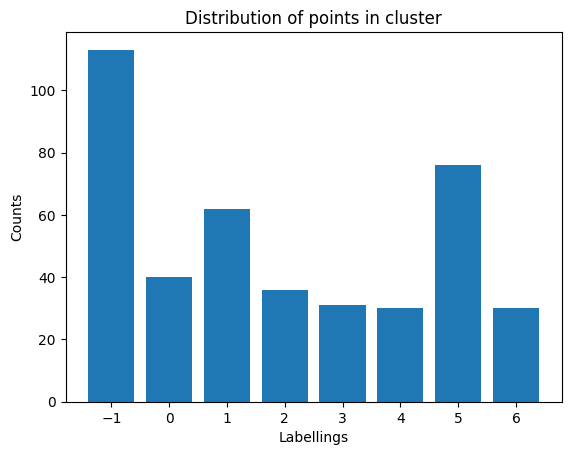

In [196]:
#Distribution of clusters
plt.title("Distribution of points in cluster")
plt.xlabel("Labellings")
plt.ylabel("Counts")
plt.bar(value, count)

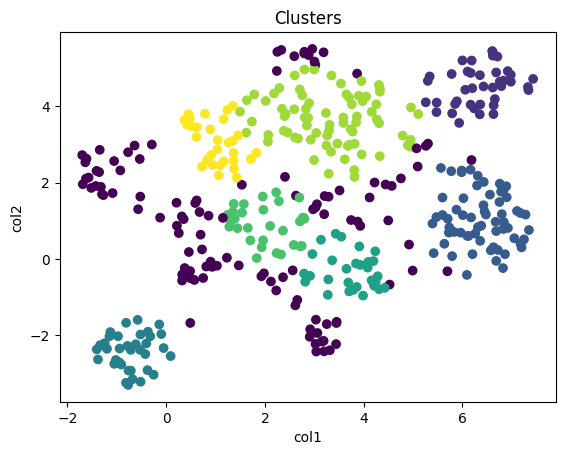

In [197]:
#Plot of clusters
plt.title("Clusters")
plt.xlabel("col1")
plt.ylabel("col2")
plt.scatter(low_dat['col1'], low_dat['col2'], c=cl_dbs)

In [198]:
#Determining the Silhouette's score
print(sil(data, cl_dbs))

-0.18425308819028763


In [199]:
#Score
min(10, len(value)+ 10*sil(data, cl_dbs) -neg -1)

5.157469118097124